In [ ]:
# !pip install Pillow

In [1]:
import os
import glob
from PIL import Image, ImageStat
import numpy as np
from skimage import io, filters
from skimage.transform import resize
import matplotlib.pyplot as plt
import seaborn as sns
from skimage.color import rgb2gray
from scipy.stats import norm

In [5]:
dataset_path = "C:/Users/reina/OneDrive/Documents/Term 6 Modules/Computational Data Science/Garbage classification"
classes = ['glass', 'paper', 'cardboard', 'plastic', 'metal', 'trash']
data = []

# Read each class folder
for cls in classes:
    class_folder = os.path.join(dataset_path, cls)
    # Get all image file paths
    image_files = glob.glob(os.path.join(class_folder, '*.jpg'))  # Assuming all images are .jpg
    # Read each image file
    for image_file in image_files:
        # Open image file
        with Image.open(image_file) as img:
            img_data = np.array(img)
            data.append((img_data, cls))
            
data

[(array([[[191, 189, 176],
          [191, 189, 176],
          [191, 189, 176],
          ...,
          [199, 200, 186],
          [199, 200, 186],
          [199, 200, 186]],
  
         [[191, 189, 176],
          [191, 189, 176],
          [192, 190, 177],
          ...,
          [200, 201, 187],
          [199, 200, 186],
          [199, 200, 186]],
  
         [[191, 189, 176],
          [192, 190, 177],
          [192, 190, 177],
          ...,
          [200, 201, 187],
          [200, 201, 187],
          [199, 200, 186]],
  
         ...,
  
         [[179, 180, 166],
          [192, 193, 179],
          [202, 203, 189],
          ...,
          [215, 217, 204],
          [215, 217, 204],
          [215, 217, 204]],
  
         [[139, 140, 126],
          [165, 166, 152],
          [189, 190, 176],
          ...,
          [215, 217, 204],
          [215, 217, 204],
          [215, 217, 204]],
  
         [[100, 101,  87],
          [136, 137, 123],
          [173, 174, 160

# Total no. of images in data

In [6]:
total_number_of_images = len(data)
print(f"The total number of images in the dataset is: {total_number_of_images}")

The total number of images in the dataset is: 2527


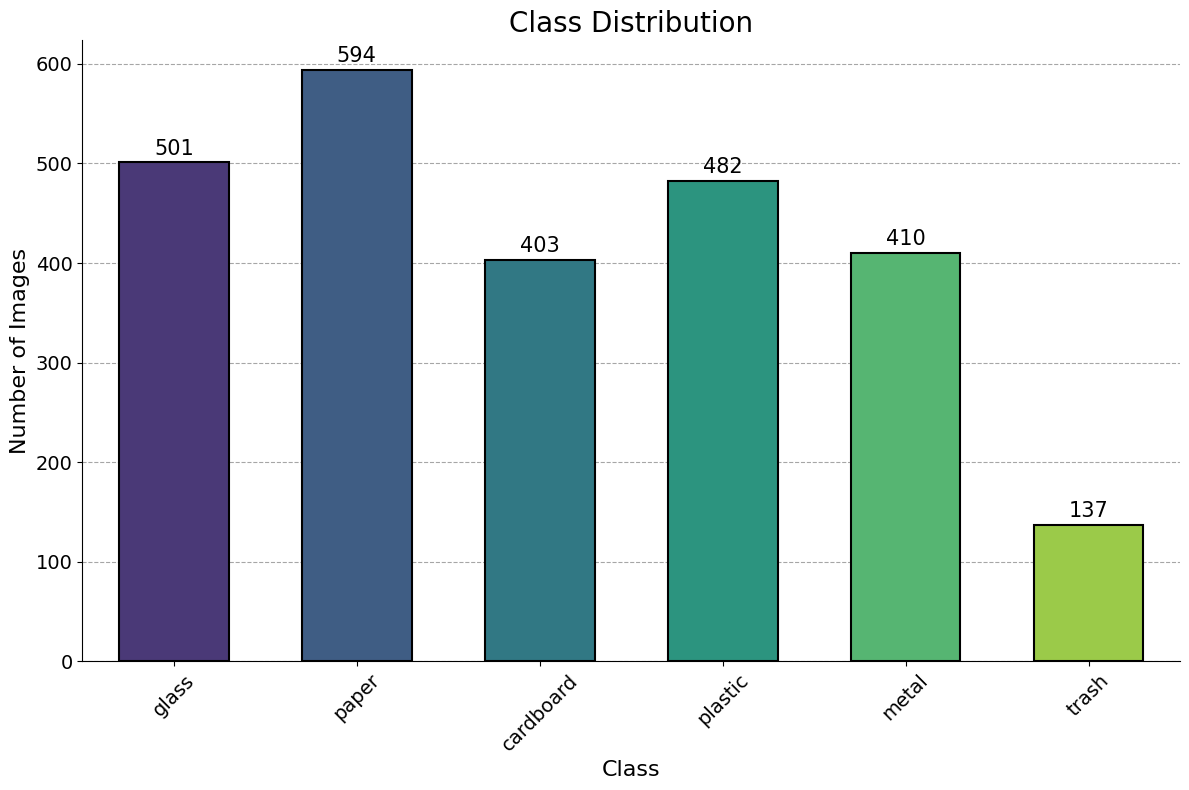

In [7]:
def plot_class_distribution_enhanced(data, classes):
    # Count no. of images per class
    class_counts = {cls: 0 for cls in classes}
    for _, label in data:
        class_counts[label] += 1

    plt.figure(figsize=(12, 8))
    ax = sns.barplot(x=list(class_counts.keys()), y=list(class_counts.values()), palette='viridis', edgecolor='black', saturation=0.8, capsize=0.8, linewidth=1.5, width=0.6)

    # Add annotations on top of bars
    for p in ax.patches:
        ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='center', fontsize=15, color='black', xytext=(0, 10),
                    textcoords='offset points')
    
    ax.tick_params(axis='x', labelsize=14) 
    ax.tick_params(axis='y', labelsize=14)
    ax.yaxis.grid(True, linestyle='--', which='major', color='grey', alpha=0.7)
    ax.xaxis.grid(False)
    ax.set_axisbelow(True)
    
    sns.despine()
    plt.title('Class Distribution', fontsize=20)
    plt.xlabel('Class', fontsize=16)
    plt.ylabel('Number of Images', fontsize=16)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.savefig("C:/Users/reina/Documents/Downloads/imgclasses.svg", transparent=True)
    plt.show()

plot_class_distribution_enhanced(data, classes)


In [12]:
image_dimensions = {cls: set() for cls in classes}

for cls in classes:
    class_folder = os.path.join(dataset_path, cls)
    # Get all image file paths
    image_files = glob.glob(os.path.join(class_folder, '*.jpg'))  # Assuming all images are .jpg
    
    # Read each image file
    for image_file in image_files:
        # Open the image file
        with Image.open(image_file) as img:
            # Record the dimensions (width, height) of the image
            image_dimensions[cls].add(img.size)

# Check if all images in each class are of the same size
for cls, dimensions in image_dimensions.items():
    if len(dimensions) == 1:
        print(f"All images in class '{cls}' are of the same size: {dimensions.pop()}")
    else:
        print(f"Images in class '{cls}' have varying sizes.")

All images in class 'glass' are of the same size: (512, 384)
All images in class 'paper' are of the same size: (512, 384)
All images in class 'cardboard' are of the same size: (512, 384)
All images in class 'plastic' are of the same size: (512, 384)
All images in class 'metal' are of the same size: (512, 384)
All images in class 'trash' are of the same size: (512, 384)


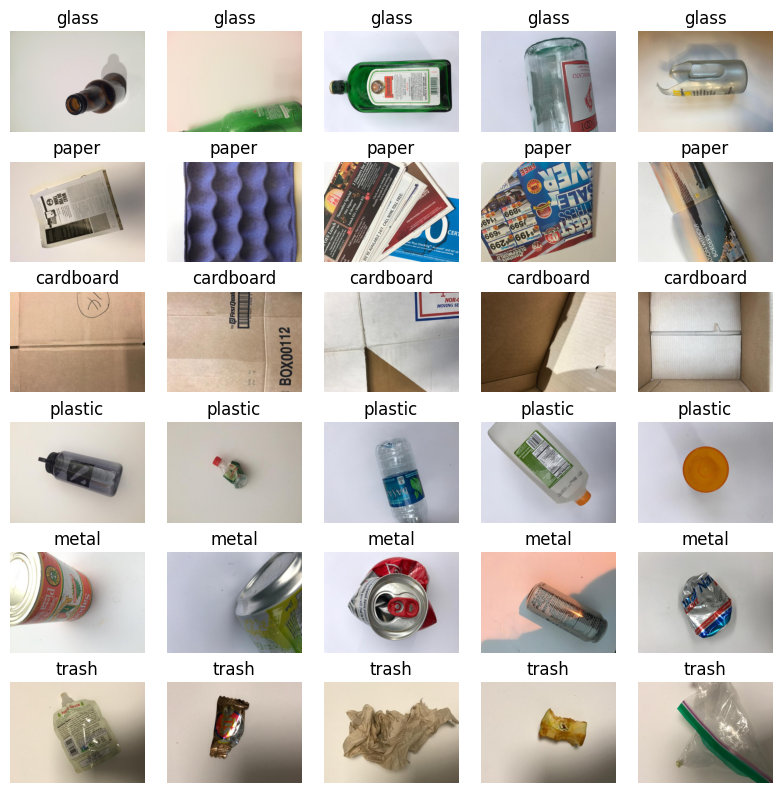

In [6]:
def show_sample_images(data, classes, samples_per_class=5):
    plt.figure(figsize=(8, 8))
    for idx, cls in enumerate(classes):
        # Get 'samples_per_class' number of samples for the current class
        class_samples = [img for img, label in data if label == cls][:samples_per_class]
        for i, img in enumerate(class_samples):
            plt.subplot(len(classes), samples_per_class, idx * samples_per_class + i + 1)
            plt.imshow(img)
            plt.title(cls)
            plt.axis('off')
    plt.tight_layout()
    plt.savefig("C:/Users/reina/Documents/Downloads/sampleimages.svg", transparent=True)
    plt.show()

show_sample_images(data, classes)


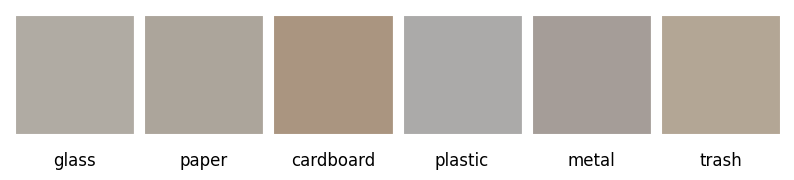

In [7]:
def calculate_average_color(image):
    return np.mean(image, axis=(0, 1))

def plot_color_swatches(average_colors, classes):
    # Create a figure and a subplot with no axes
    fig, ax = plt.subplots(figsize=(10, 2))
    ax.axis('off')
    
    # Plot a color swatch for each class
    for idx, cls in enumerate(classes):
        avg_color = np.array(average_colors[cls]) / 255
        rect = plt.Rectangle((idx, 0), 1, 1, facecolor=avg_color, edgecolor='white', linewidth=8)
        ax.add_patch(rect)
        ax.text(idx + 0.5, -0.1, cls, va='top', ha='center', fontsize=12)

    # Set the limits and aspect ratio
    ax.set_xlim(0, len(classes))
    ax.set_ylim(0, 1)
    ax.set_aspect('equal')
    plt.savefig("C:/Users/reina/Documents/Downloads/colorswatch.svg", transparent=True)
    plt.show()

# Calculate average color for each class
average_colors = {cls: [] for cls in classes}
for img, label in data:
    average_colors[label].append(calculate_average_color(img))

# Normalize colors
for cls in classes:
    average_colors[cls] = np.mean(average_colors[cls], axis=0)

    
plot_color_swatches(average_colors, classes)

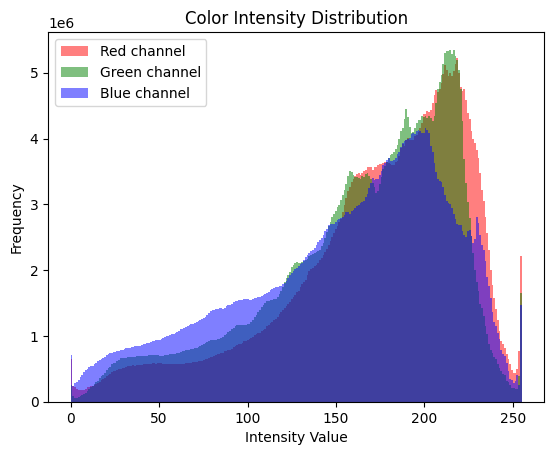

In [8]:
def plot_color_distribution(images):
    colors = ['Red', 'Green', 'Blue']
    for i, color in enumerate(colors):
        color_data = np.concatenate([img[:, :, i].ravel() for img, _ in images])
        plt.hist(color_data, bins=256, color=color.lower(), alpha=0.5, label=f"{color} channel")
    
    plt.title("Color Intensity Distribution")
    plt.xlabel("Intensity Value")
    plt.ylabel("Frequency")
    plt.legend()
    plt.savefig("C:/Users/reina/Documents/Downloads/colorintensity_overall.svg", transparent=True)
    plt.show()

plot_color_distribution(data)


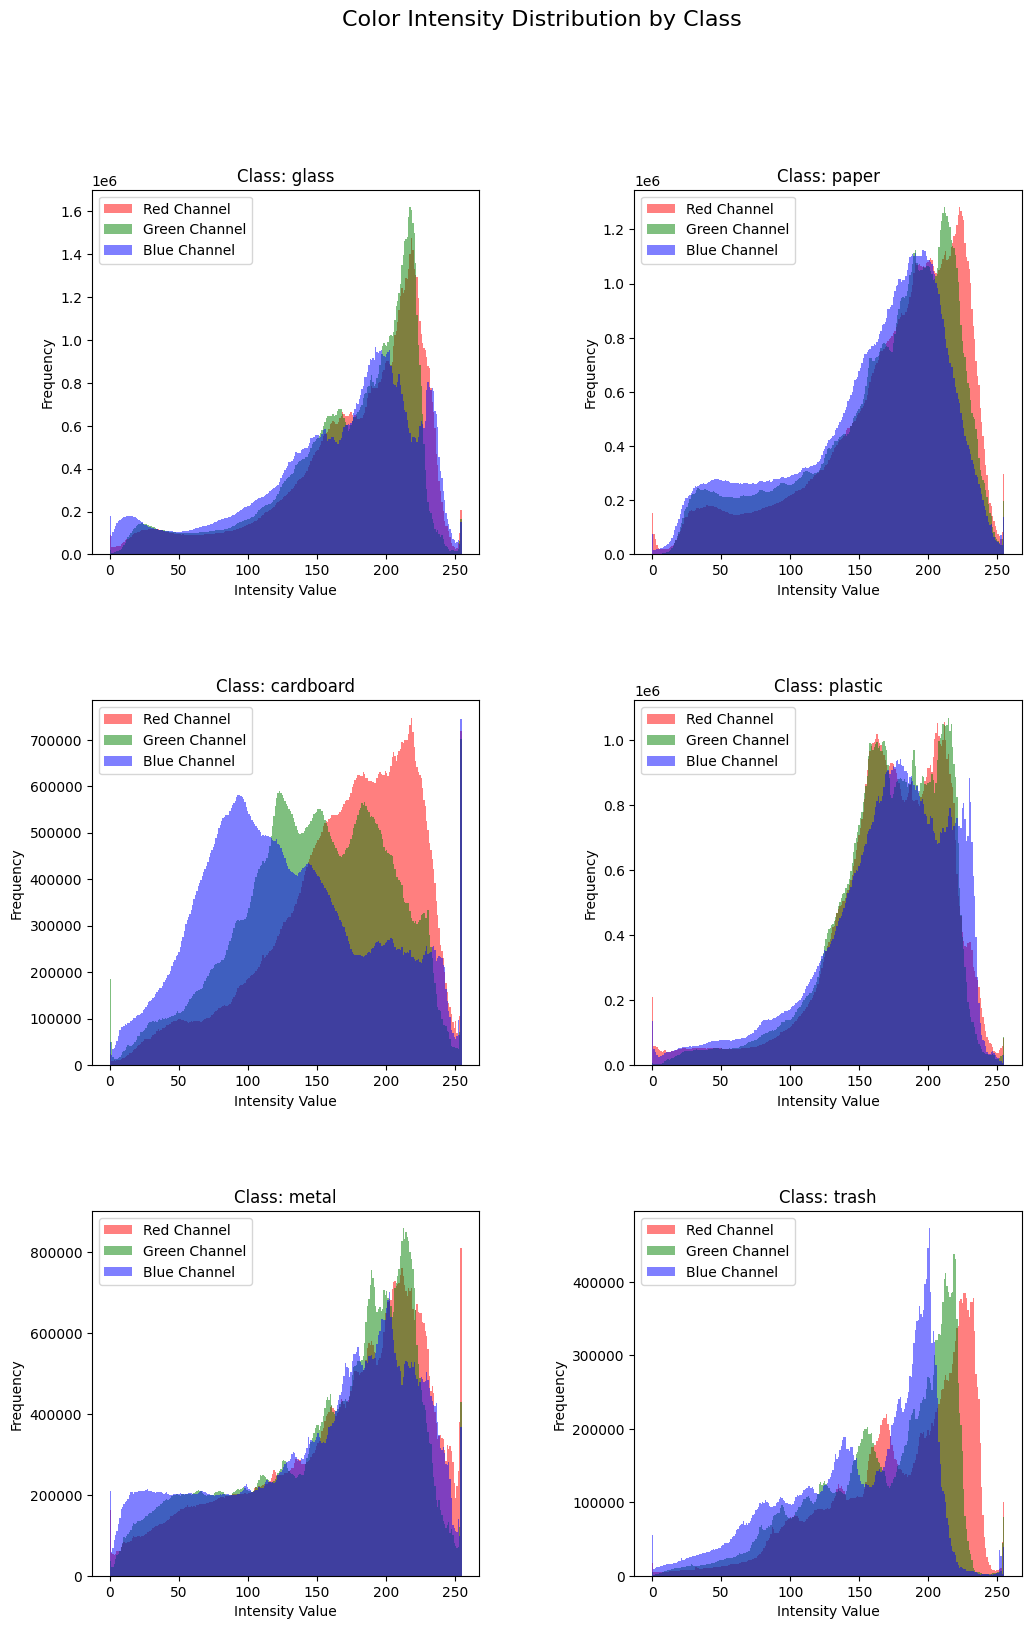

In [9]:
def plot_color_distribution_2d_matrix_per_class(images, classes):
    fig, axes = plt.subplots(3, 2, figsize=(12, 18))
    fig.subplots_adjust(hspace=0.4, wspace=0.4)
    axes = axes.flatten()
    colors = ['Red', 'Green', 'Blue']

    for idx, cls in enumerate(classes):
        if idx >= len(axes):
            break
        class_images = [img for img, label in images if label == cls]
        if not class_images:
            continue
        
        for color_idx, color in enumerate(colors):
            color_data = np.concatenate([img[:, :, color_idx].ravel() for img in class_images])
            axes[idx].hist(color_data, bins=256, color=color.lower(), alpha=0.5, label=f"{color} Channel")
        
        axes[idx].set_title(f'Class: {cls}')
        axes[idx].legend()
        axes[idx].set_xlabel('Intensity Value')
        axes[idx].set_ylabel('Frequency')
    
    for ax in axes[len(classes):]:
        ax.set_visible(False)
    
    plt.suptitle('Color Intensity Distribution by Class', fontsize=16)
    plt.savefig("C:/Users/reina/Documents/Downloads/colorintensity_classes.svg", transparent=True)
    plt.show()

plot_color_distribution_2d_matrix_per_class(data, classes)


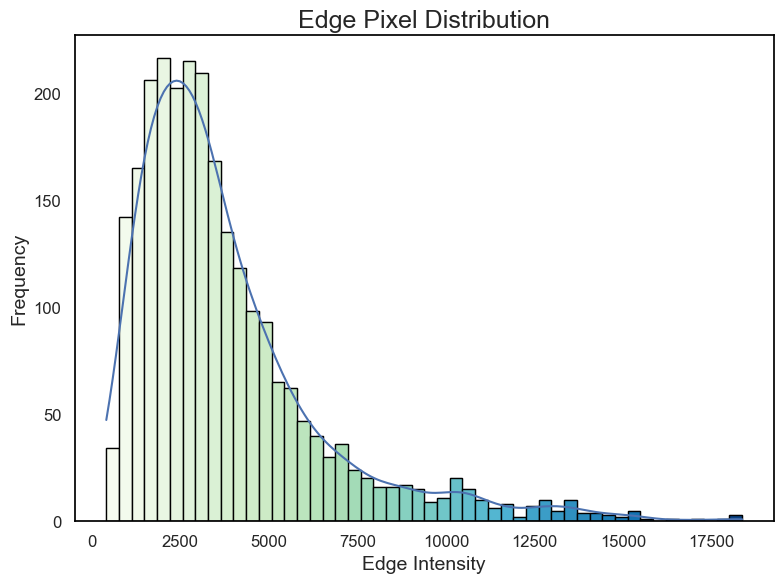

In [23]:
def plot_edge_distribution_enhanced(images):
    edge_counts = [np.sum(filters.sobel(rgb2gray(img))) for img, _ in images]
    plt.figure(figsize=(8, 6))
    sns.histplot(edge_counts, bins=50, kde=True, edgecolor='black', alpha=0.6)
    sns.set(style="whitegrid")
    color_map = plt.cm.GnBu
    
    mu, std = norm.fit(edge_counts)
    n, bins, patches = plt.hist(edge_counts, bins=50, density=False, alpha=1, edgecolor='black', linewidth=1)
    
    # Color code each bin based on its position
    col = (bins[:-1] - min(bins[:-1])) / (max(bins[:-1]) - min(bins[:-1]))
    for c, p in zip(col, patches):
        plt.setp(p, 'facecolor', color_map(c))
    
    plt.title("Edge Pixel Distribution", fontsize=18)
    plt.xlabel("Edge Intensity", fontsize=14)
    plt.ylabel("Frequency", fontsize=14)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    
    # Make the border black
    plt.gca().spines['top'].set_color('black')
    plt.gca().spines['bottom'].set_color('black')
    plt.gca().spines['left'].set_color('black')
    plt.gca().spines['right'].set_color('black')
 
    plt.grid(False)
#     plt.grid(True, which='both', linestyle='--', linewidth=0.5, color='grey', alpha=0.5)
    plt.gca().set_axisbelow(True)
    
    plt.tight_layout()
    plt.savefig("C:/Users/reina/Documents/Downloads/edgepixel_overall.svg", transparent=True)
    plt.show()
    
plot_edge_distribution_enhanced(data)

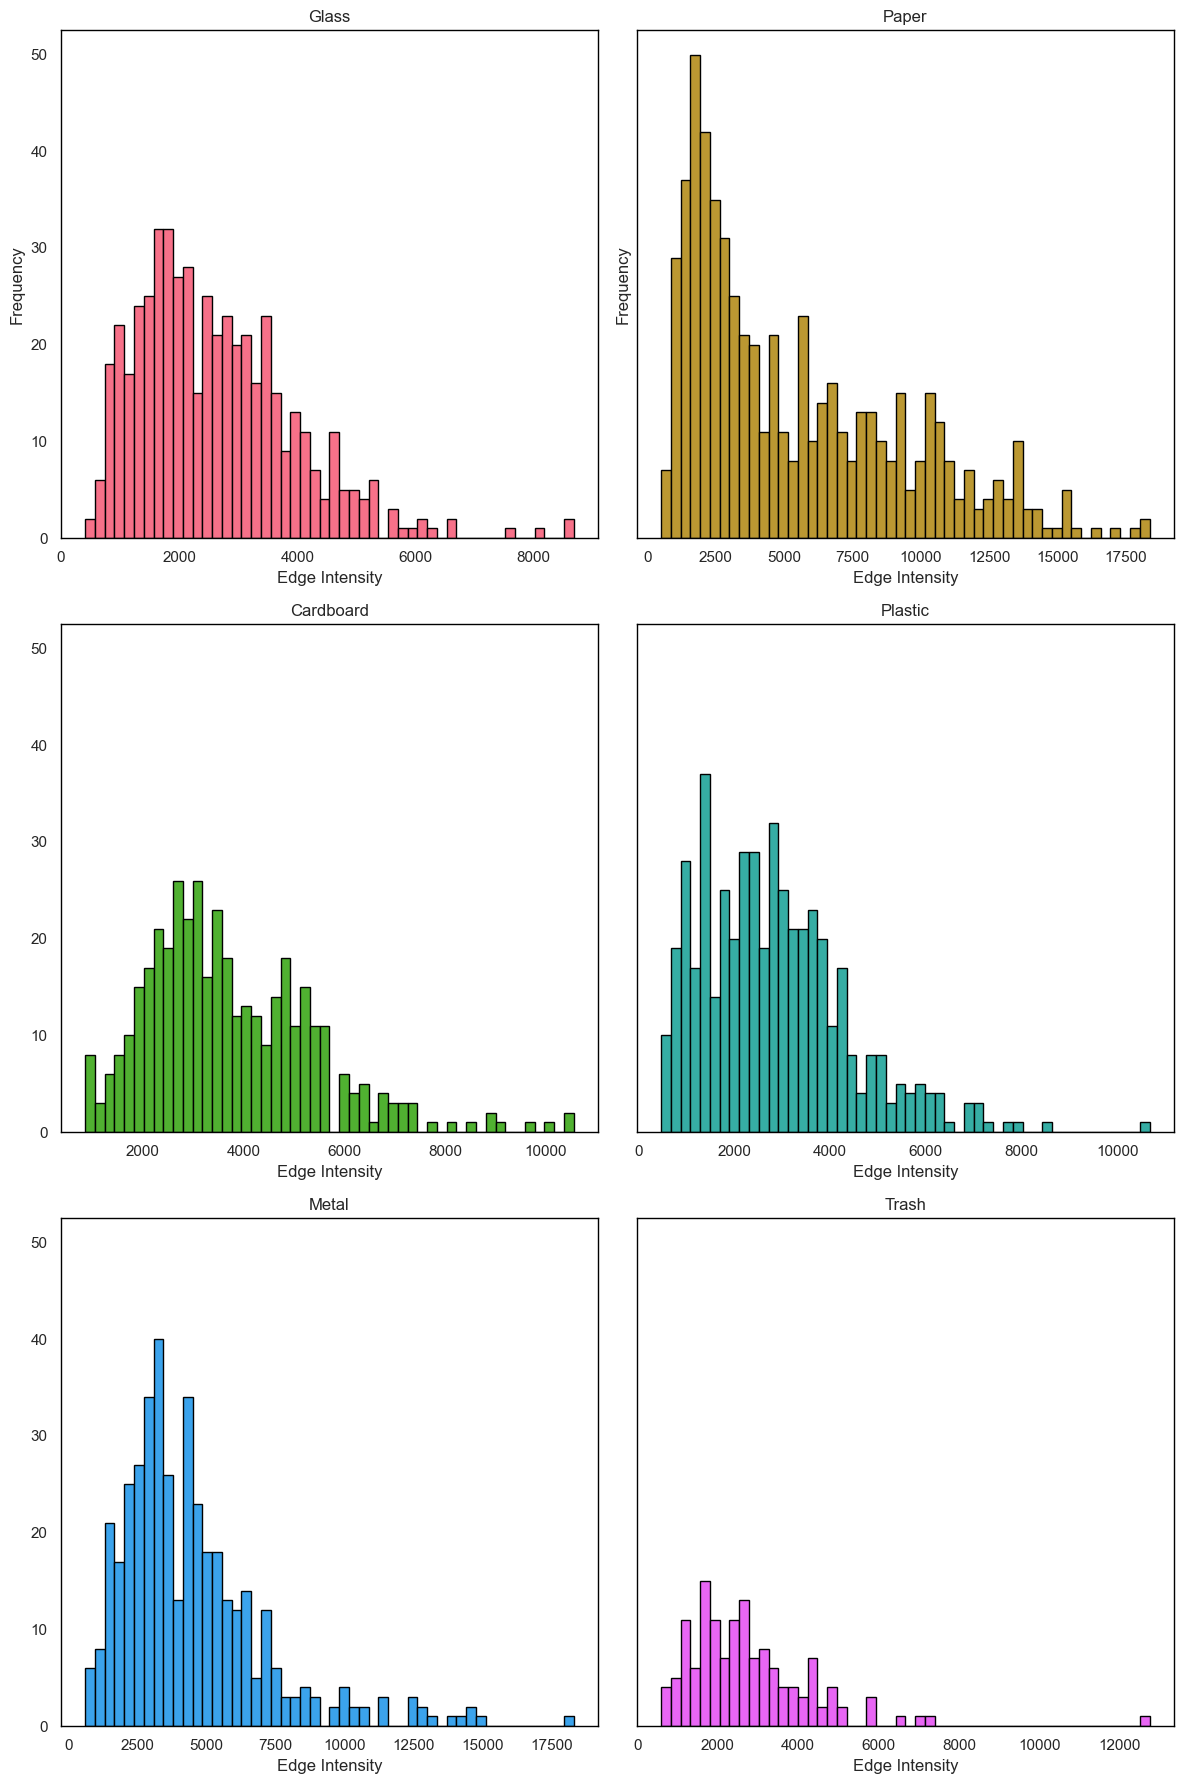

In [21]:
def plot_edge_distribution_per_class(data, classes):
    # Initialize a dictionary to hold edge data for each class
    edge_data = {cls: [] for cls in classes}

    # Calculate edge intensities for images in each class
    for img, label in data:
        edge_intensity = np.sum(filters.sobel(rgb2gray(img)))
        edge_data[label].append(edge_intensity)

    fig, axes = plt.subplots(3, 2, figsize=(12, 18), sharey=True)
#     sns.set(style="whitegrid")
    palette = sns.color_palette("husl", len(classes))

    # Flatten the axes array for easier iteration
    axes = axes.flatten()

    for ax, cls, color in zip(axes, classes, palette):
        # Plot histogram with a color gradient
        ax.hist(edge_data[cls], bins=50, color=color, alpha=1, edgecolor='black')
        ax.set_title(f"{cls.capitalize()}")
        ax.set_xlabel("Edge Intensity")
        
        if ax in axes[:2]: 
            ax.set_ylabel("Frequency")
            
        for spine in ax.spines.values():
            spine.set_edgecolor('black')
            spine.set_linewidth(1)
        ax.grid(False)
#         ax.grid(True, which='both', linestyle='--', linewidth=0.5, color='grey', alpha=0.5) 
        
    plt.tight_layout()
    plt.savefig("C:/Users/reina/Documents/Downloads/edgepixel_classes.svg", transparent=True)
    plt.show()

plot_edge_distribution_per_class(data, classes)


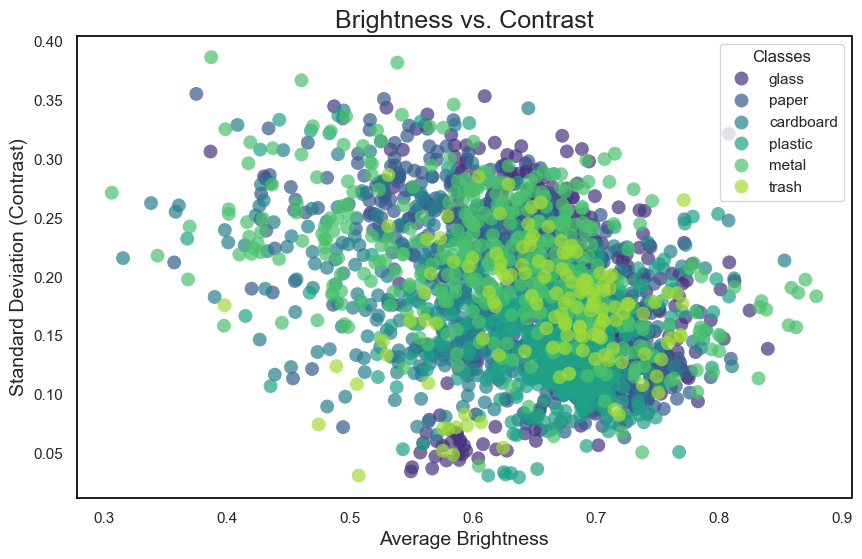

In [24]:
def plot_brightness_contrast(images):
    brightness = [np.mean(rgb2gray(img)) for img, _ in images]
    contrast = [np.std(rgb2gray(img)) for img, _ in images]
    labels = [label for _, label in images]  # Extract labels for color coding
    sns.set_style("whitegrid")
    plt.figure(figsize=(10, 6))
    scatter = sns.scatterplot(x=brightness, y=contrast, hue=labels, s=100, edgecolor="none", alpha=0.7, palette="viridis")

    plt.title("Brightness vs. Contrast", fontsize=18)
    plt.xlabel("Average Brightness", fontsize=14)
    plt.ylabel("Standard Deviation (Contrast)", fontsize=14)
    plt.legend(title='Classes', loc='upper right') 
#     plt.grid(True, which='both', linestyle='--', linewidth=0.5, color='grey', alpha=0.5)

# Make the border black
    plt.gca().spines['top'].set_color('black')
    plt.gca().spines['bottom'].set_color('black')
    plt.gca().spines['left'].set_color('black')
    plt.gca().spines['right'].set_color('black')
    
    plt.grid(False)
    plt.savefig("C:/Users/reina/Documents/Downloads/brightnesscontrast.svg", transparent=True)
    
    
    plt.show()

plot_brightness_contrast(data)


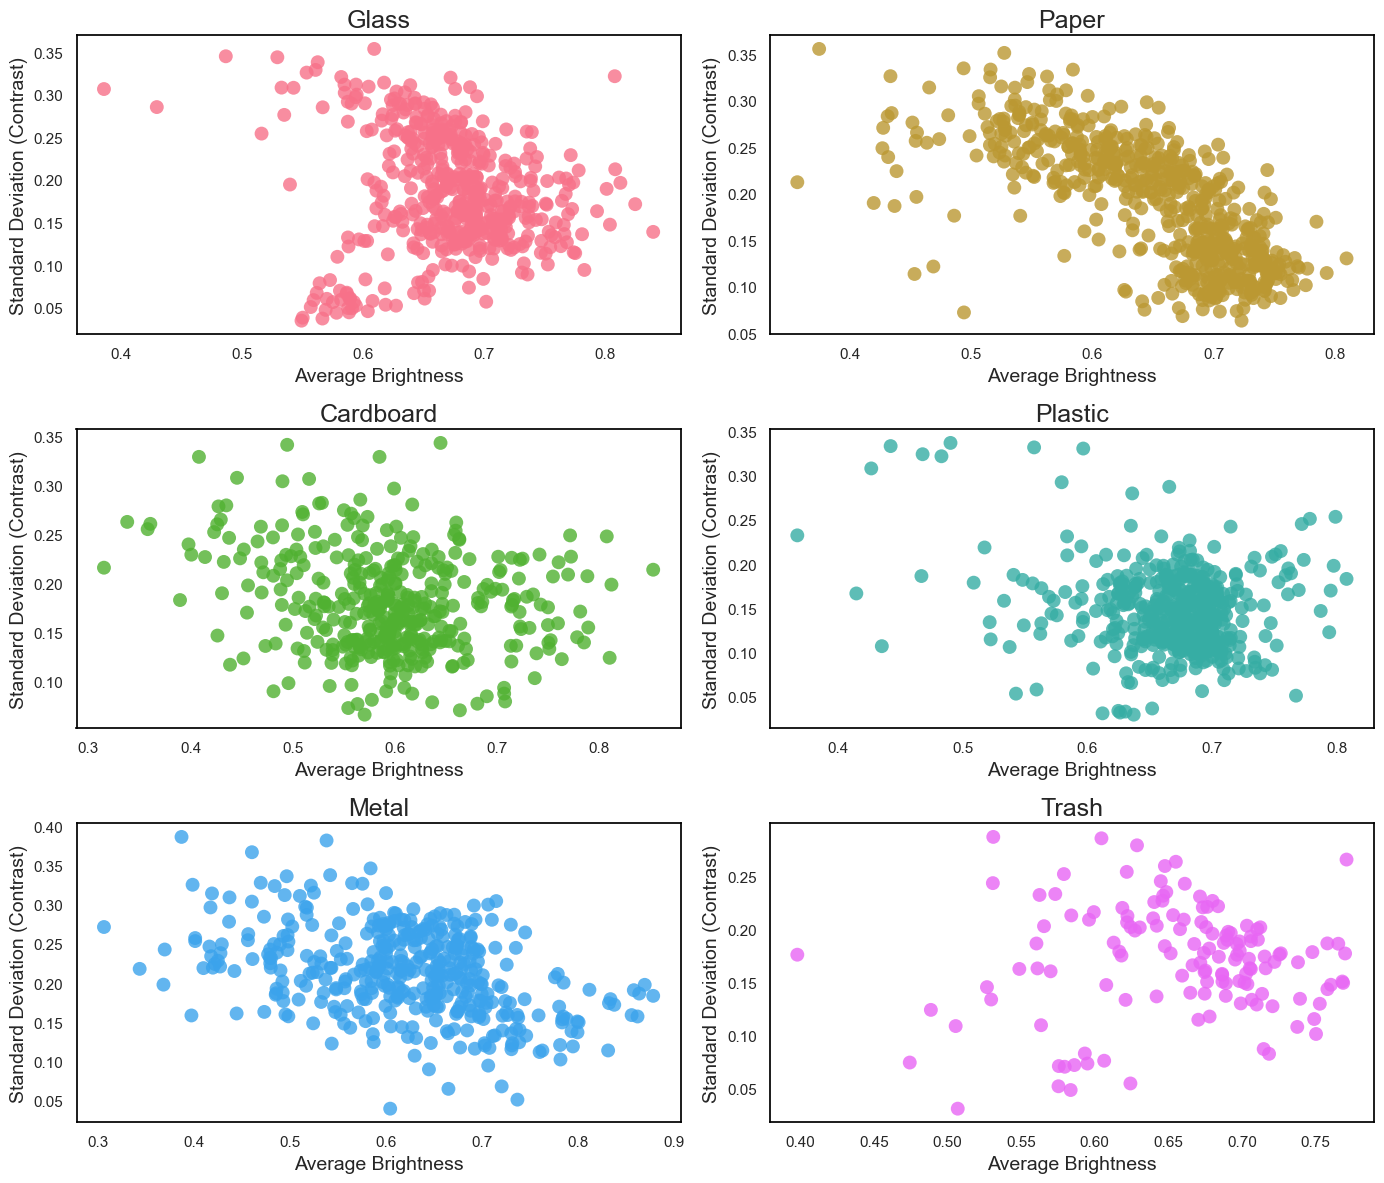

In [22]:
def plot_brightness_contrast_separate(images, classes):
    # Define a unique color for each class
    colors = sns.color_palette("husl", len(classes))
    class_to_color = dict(zip(classes, colors))
    
    # Set up the matplotlib figure and axes
    fig, axes = plt.subplots(3, 2, figsize=(14, 12))  
    axes = axes.ravel()  # Flatten the 2D array of axes for easy iteration

    # Loop through each class and plot separately
    for i, cls in enumerate(classes):
        # Filter images for the current class
        class_images = [(img, label) for img, label in images if label == cls]
        brightness = [np.mean(rgb2gray(img)) for img, _ in class_images]
        contrast = [np.std(rgb2gray(img)) for img, _ in class_images]

        sns.set_style("whitegrid")
        # Create scatter plot on the appropriate subplot
        sns.scatterplot(x=brightness, y=contrast, s=100, edgecolor="none", alpha=0.8, ax=axes[i], color=class_to_color[cls])

        axes[i].set_title(f"{cls.capitalize()}", fontsize=18)
        axes[i].set_xlabel("Average Brightness", fontsize=14)
        axes[i].set_ylabel("Standard Deviation (Contrast)", fontsize=14)
        axes[i].grid(False)
#         axes[i].grid(True, which='both', linestyle='--', linewidth=0.5, color='grey', alpha=0.5)
        
        for spine in axes[i].spines.values():
            spine.set_edgecolor('black')
            
#     # Hide any unused subplots
#     for j in range(i + 1, len(axes)):
#         axes[j].axis('off')

    plt.tight_layout()
    plt.savefig("brightnesscontrast_classes.svg", transparent=True)
    plt.show()


plot_brightness_contrast_separate(data, classes)
